In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import animation
from math import sqrt
from math import exp
import re

## Question 1 : Logistic Regression / LDA

In [2]:
df = pd.read_csv("classification.csv")
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


In [4]:
df.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


### Part 1.1: Plotting Dataset for the 2 classes

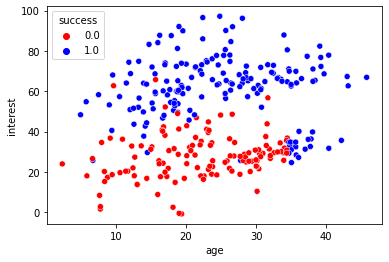

In [5]:
sns.scatterplot(data = df, x = 'age', y = 'interest', hue = 'success', palette={0:'red', 1:'blue'})
plt.show()

### Part 1.2:Implementing and Analyzing Least Square Method for Classification

In [6]:
df.shape

(297, 3)

In [7]:
df_new = df.copy()

In [8]:
def find_mean_std(df, attr):
    """
    This function taken in a dataframe and an attribute name as arguments
    Returns a tuple of mean and standard deviation of the attribute
    """
    mean_attr = 0
    for attr_val in df[attr]:
        mean_attr = mean_attr + attr_val
    mean_attr = mean_attr/len(df[attr])
    
    std_attr  = 0
    for attr_val in df[attr]:
        std_attr = std_attr + (attr_val - mean_attr)**2
    std_attr = std_attr/len(df[attr])
    
    std_attr = sqrt(std_attr)
    return mean_attr, std_attr
def standardize_df(df, attr):
    """
    This function taken in a dataframe and a list of attribute names as arguments
    Returns the standardized dataframe
    """
    df_new = df.copy()
    for v in attr:
        a_mean, a_std = find_mean_std(df_new, v)
        for i,entry in enumerate(df_new[v]):
            df_new.loc[i, v] = (entry - a_mean)/a_std
    return df_new

In [9]:
# The new dataframe being standardized
df_new = standardize_df(df_new, ['age', 'interest'])
df_new

,age,interest,success
0,-0.005867,-1.283180,0.0
1,-0.128374,-1.323815,0.0
2,0.999394,-0.799421,0.0
3,-1.920167,-0.970912,1.0
4,-1.051840,-1.378487,0.0
...,...,...,...
292,0.450613,-1.285945,0.0
293,-0.967194,1.141170,1.0
294,-0.163333,0.979355,1.0
295,0.222363,1.967736,1.0


In [10]:
df_new.describe()

,age,interest,success
count,2.970000e+02,2.970000e+02,297.000000
mean,2.336328e-17,-6.359017e-16,0.569024
std,1.001688e+00,1.001688e+00,0.496049
min,-2.414058e+00,-2.182506e+00,0.000000
25%,-7.579976e-01,-8.347590e-01,0.000000
50%,-4.814903e-02,-5.887924e-02,1.000000
75%,7.855554e-01,8.296443e-01,1.000000
max,2.493372e+00,2.289700e+00,1.000000


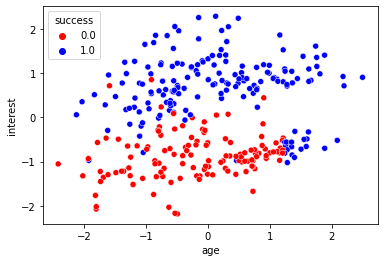

In [11]:
# Plot of the standardized dataset
sns.scatterplot(data = df_new, x = 'age', y = 'interest', hue = 'success', palette={0:'red', 1:'blue'})
plt.show()

In [12]:
d = df.shape[1] - 1 # number of features
n = df.shape[0]     # number of data-points
X_tilde = np.zeros((n, d + 1))

In [13]:
X_tilde[:, 0] = 1

In [14]:
X_tilde[:, 1:] = df_new.iloc[:, 0:2]

In [15]:
Y = np.zeros((n, 2))
for i in range(n):
    if df_new.iloc[i, 2] == 1:
        Y[i, 1] = 1
    else:
        Y[i, 0] = 1

In [17]:
W = np.linalg.inv(X_tilde.T @ X_tilde) @  X_tilde.T @ Y

In [18]:
W

array([[ 0.43097643,  0.56902357],
       [-0.03266792,  0.03266792],
       [-0.37204239,  0.37204239]])

In [19]:
# So equation of decision boundary is obtained by equating the two equations corresponding to 2 classes
age_vals = np.linspace(-2.5, 2.5, num = 1000000)
interest_vals = (-1 * (W[0][0] - W[0][1]) - (W[1][0] - W[1][1]) * age_vals)/(W[2][0] - W[2][1])

In [20]:
predict = lambda x1, x2: ((W[0][0] - W[0][1]) + (W[1][0] - W[1][1])*x1 + (W[2][0] - W[2][1]) * x2)*(-1)

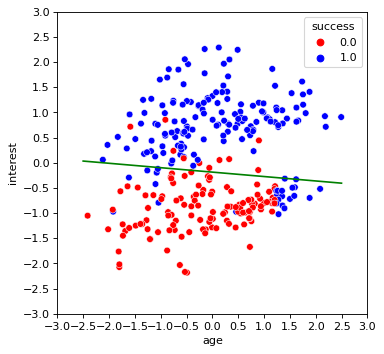

In [21]:
plt.figure(figsize=(5, 5), dpi = 80)
sns.scatterplot(data = df_new, x = 'age', y = 'interest', hue = 'success',palette = {0:'red', 1:'blue'})
plt.plot(age_vals, interest_vals, color = 'green')
plt.xticks(np.arange(-3,3.1,0.5))
plt.yticks(np.arange(-3,3.1,0.5))
plt.show()

### Performance Analysis

In [22]:
blue_data = [(tx,ty) for (tx,ty) in zip(X_tilde[:, 1:3], Y[:, 1]) if ty == 1]
red_data = [(tx,ty) for (tx,ty) in zip(X_tilde[:, 1:3], Y[:, 1]) if ty == 0]

In [23]:
incorrect_blue_data = [point for point in blue_data if predict(point[0][0], point[0][1]) < 0]
incorrect_red_data = [point for point in red_data if predict(point[0][0], point[0][1]) >= 0]

In [24]:
# Accuracy Measure:
accuracy_lsquare = (1 - (len(incorrect_blue_data) + len(incorrect_red_data))/(len(X_tilde))) * 100
accuracy_lsquare

87.54208754208754

In [25]:
print(f'''{len(incorrect_blue_data)} number of blue points incorrectly classified  as red
and
{len(incorrect_red_data)} number of red points incorrectly classified as blue''')

27 number of blue points incorrectly classified  as red
and
10 number of red points incorrectly classified as blue


In [26]:
# Equation of boundary:
print(f''' Equation of the decision boundary after subtracting y_hat_blue from y_hat_red is:
{W[0][1] - W[0][0]} + {W[1][1] - W[1][0]} * age + {W[2][1] - W[2][0]} * interest = 0''')

 Equation of the decision boundary after subtracting y_hat_blue from y_hat_red is:
0.13804713804713836 + 0.06533584101439405 * age + 0.7440847874225556 * interest = 0


## Results of Least Square Method for Classification:
- The data was first standardized, i.e. made to have mean 0 and variance 1 on the age and interest attributes
- The OLS formula for classification , i.e. (X.T * X)^(-1) X.T * Y was applied which gave y_hat prediction coefficients corresponding to each class
- The 2 linear equations after being equated gave the line plotted above, 
- which is 0.0653* age + 0.744 * interest + 0.138 = 0
- The decision boundary obtained does a decent job in classifying the points, though there are some points which it doesn't classify correctly
- Accuracy of the classifier was **87.54%**, with **27 blue points** misclassified and **10 red points** misclassified
- Qualitatively we can say if interest of a person is high enough he or she will be successful in learning a new sport
- Also people with more life experience (higher age) will be able to successfully learn the sport, these are the **Blue data points** which are misclassified by the classifier as it tries to only handle least square error

### Part 1.3: Implementing Logistic Regression Using Gradient Descent

In [27]:
def sigmoid(w0, w1, x):
    return 1/(1 + exp(-w0 - np.dot(w1,x)))

- At decision boundary P(C1|x) = sigmoid(a) = P(C2|x) = 1 - sigmoid(a)
- which gives sigmoid(a) = 1/2
- 1/(1 + exp(-a)) = 1/2
- exp(-a) = 1
- a = 0
- w0 + w1Tx = 0

In [28]:
def logistic_reg(X, y, w0, w1, eta = 0.00005, epochs = 10000):
    del_w0 = -1 * sum(y - [sigmoid(w0, w1, x) for x in X])
    del_w1 = np.array(-1 * sum([(y[i] - sigmoid(w0, w1, X[i])) * X[i, :] for i in range(len(X))]))
    i = 0
    w0_old = w0
    w1_old = w1
    while i < epochs:
        w0_old = w0
        w1_old = w1
        w0 = w0 - eta * del_w0
        w1 = w1 - eta * del_w1
        del_w0 = -1 * sum(y - [sigmoid(w0, w1, x) for x in X])
        del_w1 = np.array(-1 * sum([(y[j] - sigmoid(w0, w1, X[j])) * X[j, :] for j in range(len(X))]))
        i = i + 1
    return w0, w1

In [29]:
# Value of w initialized to 0
w0 = 0
w1 = np.array([0.0,0.0])

In [30]:
X = df_new.iloc[:, 0:2].values
Y = df_new.iloc[:, 2].values

In [31]:
w0, w1 = logistic_reg(X, Y, w0, w1)

In [32]:
w0, w1

(0.9939403521492215, array([0.65915001, 3.49078548]))

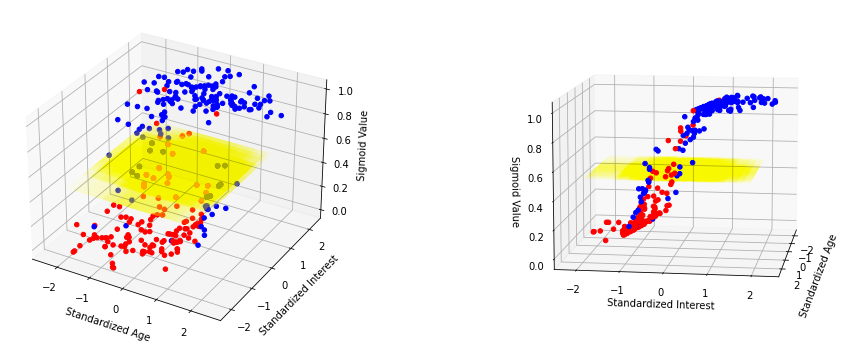

In [33]:
x = df_new.iloc[:, 0]
y = df_new.iloc[:, 1]
color_sequence = ['red' if yy == 0 else 'blue' for yy in Y]
z = pd.Series([sigmoid(w0, w1, x) for x in X])
xx = np.linspace(-3, 3, 100)
yy = np.linspace(-3, 3, 100)
xx, yy = np.meshgrid(x, y)
eq = 0 * xx + 0.5


fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, eq,color = 'yellow',shade = False, alpha = 0.01)
ax.set_xlabel("Standardized Age")
ax.set_ylabel("Standardized Interest")
ax.set_zlabel("Sigmoid Value")
ax.scatter(x, y, z, s=20, c=np.array(color_sequence), marker='o', alpha=1)


ax = fig.add_subplot(1, 2, 2, projection = '3d')
ax.set_xlabel("Standardized Age")
ax.set_ylabel("Standardized Interest")
ax.set_zlabel("Sigmoid Value")
ax.scatter(x, y, z, s=20, c=np.array(color_sequence), marker='o', alpha=1)
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, eq,color = 'yellow',shade = False, alpha = 0.01)
ax.view_init(10, 8)
plt.show()

In [34]:
blue_data = [(tx,ty) for (tx,ty) in zip(X, Y) if ty == 1]
red_data = [(tx,ty) for (tx,ty) in zip(X, Y) if ty == 0]
incorrect_blue_data = [point for point in blue_data if sigmoid(w0, w1, point[0])<0.5]
incorrect_red_data = [point for point in red_data if sigmoid(w0, w1, point[0])>=0.5]

In [35]:
total_misclassified_logistic = len(incorrect_blue_data) + len(incorrect_red_data)
total_misclassified_logistic

38

In [36]:
len(incorrect_blue_data), len(incorrect_red_data)

(24, 14)

In [37]:
accuracy_logistic = 1 - total_misclassified_logistic/(len(blue_data) + len(red_data))
accuracy_logistic * 100

87.20538720538721

### Comparison of Logistic Regression with Least Squares
- Logistic regression has a performance similar to least square classsification as is seen from above accuracy
- In fact here least square classification had 37 incorrectly classified points, and it's accuracy was slightly better
- This might be in the training data, but possibly for test data logistic regression may give better results, here dataset wasn't divided into training and testing because it was not explicitly asked, and dataset had only 297 points
- Also the gradient descent step in the logistic regression introduces some error based on number of iterations and learning rate

### Part 4: Plotting the Logistic Regression Boundary in 2-D

In [38]:
age_vals = np.linspace(-2.5, 2.5, num = 1000000)
interest_vals = (-1 * (w0) - (w1[0]) * age_vals)/(w1[1])

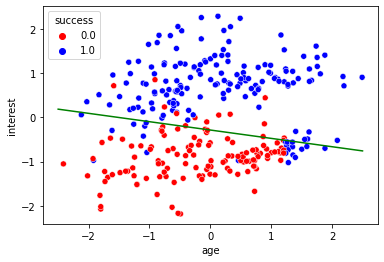

In [39]:
sns.scatterplot(data = df_new, x = 'age', y = 'interest', hue = 'success',palette = {0:'red', 1:'blue'})
plt.plot(age_vals, interest_vals, color = 'green')
plt.show()

## Part 5: Linear Discriminant Boundary

#### Finding Mean of the separate classes, which are blue(successful) and red(unsuccessful) points

In [40]:
mu1 = np.reshape(sum([x[0] for x in blue_data])/len(blue_data), (-1, 1))
mu2 = np.reshape(sum([x[0] for x in red_data])/len(red_data), (-1, 1))

In [41]:
# The below matrix is involved in maximizing the difference between means(and hence separation) of the 2 classes
# (mu1 - mu2)^2 = w.T @ B @ w
# This matrix is called between class scatter matrix
B = (mu1 - mu2) @ ((mu1 - mu2).T)

In [42]:
# Calculating Within Class scatter matrix, for blue points, 
# which is involved in trying to minimize the within class variance as
# s1^2 = w.T @ S1 @ w
S1 = np.zeros((d, d))
for i in range(len(blue_data)):
    S1 = S1 + (blue_data[i][0].reshape((-1, 1)) - mu1) @ ((blue_data[i][0].reshape((-1, 1)) - mu1).T)

In [43]:
# Calculating Within Class scatter matrix, for red points, 
# which is involved in trying to minimize the within class variance as
# s2^2 = w.T @ S2 @ w
S2 = np.zeros((d,d))
for i in range(len(red_data)):
    S2 = S2 + (red_data[i][0].reshape((-1, 1)) - mu2) @ ((red_data[i][0].reshape((-1, 1)) - mu2).T)

In [44]:
# The overall within class scatter matrix as sum of both within class scatter matrices
# which is invoved as w.T @ S @ w
S = S1 + S2

In [45]:
# Formulating the eigen value problem as (S^-1 @ B) w  = lambda * w
# Below id S^(-1) @ B 
mat = np.linalg.inv(S) @ B
mat

array([[0.00037636, 0.00165195],
       [0.00428617, 0.01881345]])

In [46]:
eig_val, eig_vec = np.linalg.eig(mat)

In [47]:
eig_vec

array([[-0.97501636, -0.08747043],
       [ 0.22213304, -0.99616712]])

In [48]:
eig_val

array([-3.46944695e-18,  1.91898034e-02])

In [49]:
# Verifying unit norm of eigen vector corresponding to maximum eigen value
eig_vec[:, 1].reshape((-1, 1)).T @ eig_vec[:, 1].reshape((-1, 1))

array([[1.]])

In [50]:
# Storing the eigen vector corresponding to dominant eigenvalue
w = eig_vec[:, 1].reshape((-1, 1))
w

array([[-0.08747043],
       [-0.99616712]])

In [51]:
# Finding slope of boundary line from eigen-vector
# The boundary will be perpendicular to the eigen vector
slope_vector = w[1][0]/w[0][0]
slope_boundary = -1/slope_vector
print(slope_vector, slope_boundary)

11.388615740916649 -0.08780698398728412


In [52]:
# Finding data points projected on the eigen vector
X_projected = np.zeros(X.shape)
for i, x in enumerate(X):
    X_projected[i] = ((w @ w.T) @ (x.reshape((-1, 1))-(mu1 + mu2)/2) + (mu1 + mu2)/2).reshape((2))

In [53]:
mid_point = (mu1 + mu2)/2
mid_point

array([[-0.02415583],
       [-0.10602801]])

In [54]:
# Equation of boundary is interest - interest_value = m * (age - age_value)
age_vals = np.linspace(-2.5, 2.5, num = 1000000)
interest_vals = (mid_point[1][0] - slope_boundary * mid_point[0][0] + slope_boundary * age_vals)

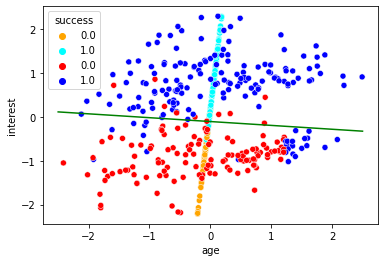

In [55]:
sns.scatterplot(x = X_projected[:, 0], y = X_projected[:, 1], hue = Y, palette={1:'cyan', 0:'orange'})
sns.scatterplot(data = df_new, x = 'age', y = 'interest', hue = 'success',palette = {0:'red', 1:'blue'})
plt.plot(age_vals, interest_vals, color = 'green')
plt.xlabel("age")
plt.ylabel("interest")
plt.show()

In [56]:
predict_lda  = lambda age, interest: interest - mid_point[1][0] - slope_boundary * age + slope_boundary * mid_point[0][0]

In [57]:
incorrect_blue_data = [point for point in blue_data if predict_lda(point[0][0], point[0][1])<0]
incorrect_red_data = [point for point in red_data if predict_lda(point[0][0], point[0][1])>=0.5]

In [58]:
lda_misclassified_pts = len(incorrect_blue_data) + len(incorrect_red_data)
print(f'{len(incorrect_blue_data)} blue points misclassified and {len(incorrect_red_data)} red points misclassified')
print(f'{lda_misclassified_pts} are total misclassified points in LDA')

29 blue points misclassified and 3 red points misclassified
32 are total misclassified points in LDA


In [59]:
accuracy_lda = 1 - lda_misclassified_pts/(len(blue_data) + len(red_data))
accuracy_lda * 100

89.22558922558923

In [60]:
# calculating constant term of decision boundary line
- mid_point[1][0]  + slope_boundary * mid_point[0][0]

0.10814906346491704

### Results:
- equation of decision boundary obtained is :
    ```interest - 0.0878 * age + 0.10814 = 0```
- LDA performs better than both logistic regression and least squares classification
- It achieved an accuracy of **89.22%** more than **87.20%** of Logistic Regression and **87.54%** of Least Squares classification
- **29 blue points** and **3 red points** were misclassified, total of **32**, lesser than **Logistic Regression(38)** and **Least Squares Classification(37)** 

## Part 6: Non-Linear Decision Boundaries Using Logistic Regression

In [61]:
def generate_feature_degrees(n):
    '''
    this function returns all possible polynomial features required for data transformation
    '''
    features_list = []
    for i in range(n + 1):
        for j in range(i+1):
            features_list.append((j, i-j))
    return features_list

In [62]:
def transform_data(X, features_list):
    X_transformed = np.zeros((X.shape[0], len(features_list) - 1))
    for i, x in enumerate(X):
        for j in range(X_transformed.shape[1]):
            X_transformed[i, j] = (X[i, 0]**(features_list[j+1][0])) * (X[i, 1]**features_list[j+1][1]) 
    return X_transformed

In [63]:
def logistic_poly(X, y, degree = 2, epochs = 10000, eta = 0.0001):
    '''
    Returns feature weights in lexicographic order of degree tuples from least to max for a particular degree
    eg: for degree = 2, weights will be in order for terms 1, x2, x1, x2^2, x2*x1, x1^2
    here lexicographic order is maintained as degree tuples list is (0, 0), (0, 1), (1, 0), (0, 2), (1, 1), (2, 0)
    '''
    features_list = generate_feature_degrees(degree)
#     print(features_list)
    w0 = 0
    W = np.zeros((len(features_list) - 1))
    X_transformed = transform_data(X, features_list)
    del_w0 = -1 * sum(y - [sigmoid(w0, W, x) for x in X_transformed])
    del_W = np.array(sum([(-y[i] + sigmoid(w0, W, X_transformed[i])) * X_transformed[i, :] for i in range(len(X_transformed))]))
    i = 0
    w0_old = w0
    W_old = W
    while i < epochs:
        w0_old = w0
        W_old = W
        w0 = w0 - eta * del_w0
        W = W - eta * del_W
        del_w0 = -1 * sum(y - [sigmoid(w0, W, x) for x in X_transformed])
        del_W = np.array(sum([(-y[j] + sigmoid(w0, W, X_transformed[j])) * X_transformed[j, :] for j in range(len(X_transformed))]))
        i = i + 1
    return features_list, X_transformed, w0, W

In [64]:
def train_test(X, Y):
    x = X.copy()
    y = Y.copy()
    np.random.seed(0)
    indices = np.arange(0, x.shape[0])
    np.random.shuffle(indices)
    train_indices = indices[ : (4 * x.shape[0])//5]
    test_indices = indices[(4 * x.shape[0])//5 : ]
    x_train = x[train_indices]
    y_train = y[train_indices]
    x_test = x[test_indices]
    y_test = y[test_indices]
    return x_train, x_test, y_train, y_test

In [65]:
X = df_new.iloc[:, 0:2].values
Y = df_new.iloc[:, 2].values

In [66]:
x_train, x_test, y_train, y_test = train_test(X, Y)

In [67]:
train_analysis_df = pd.DataFrame(data = np.zeros((8, 7)), columns=['tot_pts', 'blue_pts', 'red_pts', 'mis_as_red', 'mis_as_blue', 'tot_mis','acc'])
test_analysis_df = pd.DataFrame(data = np.zeros((8, 7)), columns=['tot_pts', 'blue_pts', 'red_pts', 'mis_as_red', 'mis_as_blue', 'tot_mis','acc'])

In [68]:
train_analysis_df['tot_pts'] = x_train.shape[0]
train_analysis_df['blue_pts'] = sum(y_train)
train_analysis_df['red_pts'] = x_train.shape[0] - train_analysis_df['blue_pts']

test_analysis_df['tot_pts'] = x_test.shape[0]
test_analysis_df['blue_pts'] = sum(y_test)
test_analysis_df['red_pts'] = x_test.shape[0] - test_analysis_df['blue_pts']

In [69]:
train_analysis_df

,tot_pts,blue_pts,red_pts,mis_as_red,mis_as_blue,tot_mis,acc
0,237,136.0,101.0,0.0,0.0,0.0,0.0
1,237,136.0,101.0,0.0,0.0,0.0,0.0
2,237,136.0,101.0,0.0,0.0,0.0,0.0
3,237,136.0,101.0,0.0,0.0,0.0,0.0
4,237,136.0,101.0,0.0,0.0,0.0,0.0
5,237,136.0,101.0,0.0,0.0,0.0,0.0
6,237,136.0,101.0,0.0,0.0,0.0,0.0
7,237,136.0,101.0,0.0,0.0,0.0,0.0


In [70]:
test_analysis_df

,tot_pts,blue_pts,red_pts,mis_as_red,mis_as_blue,tot_mis,acc
0,60,33.0,27.0,0.0,0.0,0.0,0.0
1,60,33.0,27.0,0.0,0.0,0.0,0.0
2,60,33.0,27.0,0.0,0.0,0.0,0.0
3,60,33.0,27.0,0.0,0.0,0.0,0.0
4,60,33.0,27.0,0.0,0.0,0.0,0.0
5,60,33.0,27.0,0.0,0.0,0.0,0.0
6,60,33.0,27.0,0.0,0.0,0.0,0.0
7,60,33.0,27.0,0.0,0.0,0.0,0.0


In [71]:
results = {}

In [72]:
for deg in np.arange(0, 8):
    coeff_order, x_trans, w0, w1 = logistic_poly(x_train, y_train, degree=deg)
    results[deg] = (coeff_order, x_trans, w0, w1)
    
    blue_train_data = [(tx,ty) for (tx,ty) in zip(x_trans, y_train) if ty == 1]
    red_train_data = [(tx,ty) for (tx,ty) in zip(x_trans, y_train) if ty == 0]
    incorrect_blue_train_data = [point for point in blue_train_data if sigmoid(w0, w1, point[0])<0.5]
    incorrect_red_train_data = [point for point in red_train_data if sigmoid(w0, w1, point[0])>=0.5]
    train_analysis_df.loc[deg, 'mis_as_red'] = len(incorrect_blue_train_data)
    train_analysis_df.loc[deg, 'mis_as_blue'] = len(incorrect_red_train_data)
    
    x_test_trans = transform_data(x_test, coeff_order)
    blue_test_data = [(tx,ty) for (tx,ty) in zip(x_test_trans, y_test) if ty == 1]
    red_test_data = [(tx,ty) for (tx,ty) in zip(x_test_trans, y_test) if ty == 0]
    incorrect_blue_test_data = [point for point in blue_test_data if sigmoid(w0, w1, point[0])<0.5]
    incorrect_red_test_data = [point for point in red_test_data if sigmoid(w0, w1, point[0])>=0.5]    
    test_analysis_df.loc[deg, 'mis_as_red'] = len(incorrect_red_test_data)
    test_analysis_df.loc[deg, 'mis_as_blue'] = len(incorrect_blue_test_data)
    print(f'Done for degree {deg}')

train_analysis_df['tot_mis'] = train_analysis_df['mis_as_red'] + train_analysis_df['mis_as_blue']
train_analysis_df['acc'] = 1 - train_analysis_df['tot_mis']/train_analysis_df['tot_pts']

test_analysis_df['tot_mis'] = test_analysis_df['mis_as_red'] + test_analysis_df['mis_as_blue']
test_analysis_df['acc'] = 1- test_analysis_df['tot_mis']/test_analysis_df['tot_pts']

Done for degree 0
Done for degree 1
Done for degree 2
Done for degree 3
Done for degree 4
Done for degree 5
Done for degree 6
Done for degree 7


In [73]:
train_analysis_df

,tot_pts,blue_pts,red_pts,mis_as_red,mis_as_blue,tot_mis,acc
0,237,136.0,101.0,0.0,101.0,101.0,0.573840
1,237,136.0,101.0,18.0,10.0,28.0,0.881857
2,237,136.0,101.0,6.0,8.0,14.0,0.940928
3,237,136.0,101.0,7.0,8.0,15.0,0.936709
4,237,136.0,101.0,4.0,5.0,9.0,0.962025
5,237,136.0,101.0,5.0,4.0,9.0,0.962025
6,237,136.0,101.0,5.0,4.0,9.0,0.962025
7,237,136.0,101.0,5.0,3.0,8.0,0.966245


In [74]:
test_analysis_df

,tot_pts,blue_pts,red_pts,mis_as_red,mis_as_blue,tot_mis,acc
0,60,33.0,27.0,27.0,0.0,27.0,0.550000
1,60,33.0,27.0,5.0,4.0,9.0,0.850000
2,60,33.0,27.0,4.0,1.0,5.0,0.916667
3,60,33.0,27.0,2.0,1.0,3.0,0.950000
4,60,33.0,27.0,2.0,1.0,3.0,0.950000
5,60,33.0,27.0,2.0,4.0,6.0,0.900000
6,60,33.0,27.0,2.0,2.0,4.0,0.933333
7,60,33.0,27.0,3.0,5.0,8.0,0.866667


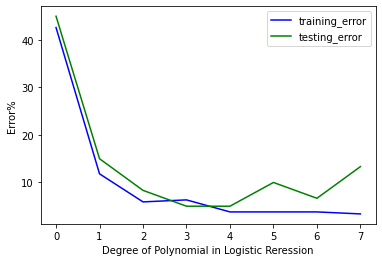

In [75]:
plt.plot(range(8), (1 - train_analysis_df['acc'])*100, color = 'blue', label = 'training_error')
plt.plot(range(8), (1 - test_analysis_df['acc'])*100, color = 'green', label = 'testing_error')
plt.xlabel("Degree of Polynomial in Logistic Reression")
plt.ylabel("Error%")
plt.legend()
plt.show()

### Inference:
- From above plot we observe:
    - Training error almost continually decreases except a little spike for degree = 3
    - For polynomials of degree 3 and 4 testing error is minimum
    - Hence we may choose any polynomial of degree 3 or 4

## Part 7: Plotting the optimal decision boundary

In [76]:
# Retrieving the coefficients calculated using training data in previous section
w0 = results[3][2]
w1 = results[3][3]

In [77]:
# degree of terms of the polynomial
results[3][0]

[(0, 0),
 (0, 1),
 (1, 0),
 (0, 2),
 (1, 1),
 (2, 0),
 (0, 3),
 (1, 2),
 (2, 1),
 (3, 0)]

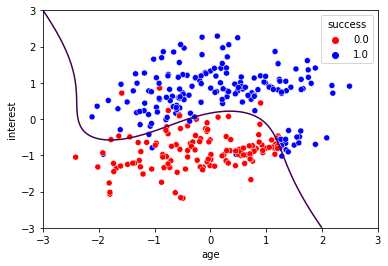

In [78]:
X_mesh = np.linspace(-3, 3, 500)
x, y = np.meshgrid(X_mesh, X_mesh)
z = w0 + w1[0]*y + w1[1]*x + w1[2]*(y**2) + w1[3]*(x*y) + w1[4]*(x**2) + w1[5]*(y**3) + w1[6]*(x*(y**2)) + w1[7]*((x**2)*y) + w1[8]*(x**3)
plt.contour(x, y, z, (0,))
sns.scatterplot(data = df_new, x = 'age', y = 'interest', hue = 'success',palette = {0:'red', 1:'blue'})
plt.xlabel("age")
plt.ylabel("interest")
plt.show()

In [79]:
# Retrieving the coefficients calculated using training data in previous section
w0 = results[4][2]
w1 = results[4][3]

In [80]:
results[4][0]

[(0, 0),
 (0, 1),
 (1, 0),
 (0, 2),
 (1, 1),
 (2, 0),
 (0, 3),
 (1, 2),
 (2, 1),
 (3, 0),
 (0, 4),
 (1, 3),
 (2, 2),
 (3, 1),
 (4, 0)]

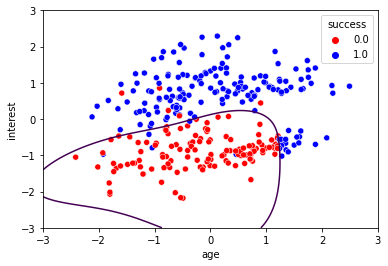

In [81]:
X_mesh = np.linspace(-3, 3, 500)
x, y = np.meshgrid(X_mesh, X_mesh)
z = w0 + w1[0]*y + w1[1]*x + w1[2]*(y**2) + w1[3]*(x*y) + w1[4]*(x**2) + w1[5]*(y**3) + w1[6]*(x*(y**2)) \
    + w1[7]*((x**2)*y) + w1[8]*(x**3) + w1[9]*(y**4) + w1[10]*(x*(y**3)) + w1[11]*((x**2)*(y**2)) + \
    +w1[12]*((x**3)*y) + w1[13]*(x**4)
plt.contour(x, y, z, (0,))
sns.scatterplot(data = df_new, x = 'age', y = 'interest', hue = 'success',palette = {0:'red', 1:'blue'})
plt.xlabel("age")
plt.ylabel("interest")
plt.show()

## Question 2: PCA / Decision Trees/ Random Forests

In [239]:
df1 = pd.read_csv("adult.data", header=None)
df2 = pd.read_csv("adult.test",skiprows=1, header = None)

In [240]:
df = pd.concat([df1, df2])

In [241]:
attribute_info = '''.age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.'''

In [242]:
attribute_info = attribute_info.replace('\n', '')
col_names = re.findall("[\w-]*:", attribute_info)

In [243]:
for i, col in enumerate(col_names):
    col_names[i] = col_names[i].replace(':', '')
col_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [244]:
col_names.append('income')
df.columns = col_names
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


## Data Preprocessing for Decision Trees

In [245]:
df_new = df.copy()

In [246]:
categorical_columns = []
for i in [1,3,5,6,7,8,9,13,14]:
    categorical_columns.append(df_new.columns[i])

In [247]:
for col in categorical_columns:
    print(df_new[col].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' 

In [248]:
df_new['income'] = df_new['income'].str.strip()
df_new['income'] = df_new['income'].replace(to_replace=['<=50K.','>50K.'], value=['<=50K','>50K'])
df_new['income'].unique()

array(['<=50K', '>50K'], dtype=object)

## Label Encoding
- Done so that categorical and continuous features can be handed alike in decision tree

In [249]:
# Dictionary mappings for column values
label_encoded_list = []

In [250]:
def label_encode(df, cols, label_encoded_list):
    df_new = df.copy()
    for col in cols:
        df_new[col] = df_new[col].str.strip()
        col_vals = df_new[col].unique()
        mapped_vals = np.arange(len(col_vals))
        label_encoding = dict(zip(col_vals, mapped_vals))
        label_encoded_list.append(label_encoding)
        df_new[col] = df_new[col].map(label_encoding)
    return df_new

In [251]:
df_new = label_encode(df_new, categorical_columns, label_encoded_list)

In [252]:
df_new.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0


In [253]:
df_new.reset_index(inplace=True, drop=True)

In [254]:
columns_dict = dict(zip(df_new.columns, range(len(df_new.columns))))
columns_dict

{'age': 0,
 'workclass': 1,
 'fnlwgt': 2,
 'education': 3,
 'education-num': 4,
 'marital-status': 5,
 'occupation': 6,
 'relationship': 7,
 'race': 8,
 'sex': 9,
 'capital-gain': 10,
 'capital-loss': 11,
 'hours-per-week': 12,
 'native-country': 13,
 'income': 14}

In [255]:
df_new.columns = columns_dict.values()
df_new.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0


## Train Test Split

In [256]:
def generate_data(df_):
    df = df_.copy()
    np.random.seed(0)
    indices = np.arange(0, df.shape[0])
    np.random.shuffle(indices)
    train_indices = indices[ : (4 * df.shape[0])//5]
    test_indices = indices[(4 * df.shape[0])//5 : ]
    xy_train = df.iloc[train_indices]
    xy_validation = df.iloc[test_indices]
    return xy_train, xy_validation

In [257]:
df_train, df_test = generate_data(df_new)

In [258]:
class node():
    def __init__(self, attribute_index = None, threshold = None, left_child = None, right_child = None, gain = None, leaf_node_label = None):
        '''Class which collectively defines internal decision node and leaf labelled node'''
        self.attribute_index = attribute_index
        self.threshold = threshold
        self.left_child = left_child
        self.right_child = right_child
        self.gain = gain
        self.leaf_node_label = leaf_node_label # Label of leaf node, makes sense only there

### References :1) https://www.youtube.com/watch?v=sgQAhG5Q7iY
###                       2)Data Mining and Machine Learning: Fundamental Concepts and Algorithms

In [259]:

class decision_tree():
    def __init__(self, min_samples = 100, max_purity = 0.9, max_nodes = 100, max_depth = 10):
        self.root = None
        self.min_samples = min_samples # minimum number of data points in node to continue splitting
        self.max_purity = max_purity   # maximum fraction of similar data points to continue splitting
        self.max_nodes = max_nodes     # maximum nodes in tree to continue splitting
        self.max_depth = max_depth     # maximum depth of tree to continue splitting
        
    def build_tree(self, df, num_nodes = 0, depth = 0):
        n = df.shape[0]
        m = df.shape[1] - 1
        
        output_stats = dict(df[14].value_counts())
        ratio_dict = ({k : v/n for k, v in output_stats.items()})
        purity = max(ratio_dict.values())
        
        #  making leaf node checks (base cases)
        if (n < self.min_samples) or (purity > self.max_purity) or (num_nodes > self.max_nodes) or (depth > self.max_depth):
            one_count = sum(df.iloc[:, 14])
            zero_count = df.shape[0] - one_count
            if one_count >= zero_count:
                leaf_node_label = 1
            else:
                leaf_node_label = 0 
            return node(leaf_node_label = leaf_node_label)
        
        # else I do as  below:
        max_gain_split = self.get_max_gain_split_info(df)
        num_nodes = num_nodes + 1
        left_child = self.build_tree(max_gain_split['df_left'], num_nodes, depth + 1)
        right_child = self.build_tree(max_gain_split['df_right'], num_nodes, depth + 1)
        return node(max_gain_split['attribute'], max_gain_split['threshold'], left_child, right_child, max_gain_split['gain'])
    
    
    def get_max_gain_split_info(self, df):
        
        n = df.shape[0]
        m = df.shape[1] - 1
        max_gain_split = {}
        max_info_gain = float('-inf')
        for attribute_index in np.arange(0,14):
            possible_thresholds = df[attribute_index].unique()
            for threshold in possible_thresholds:
                df_left = df[df[attribute_index]<=threshold]
                df_right = df[df[attribute_index]>threshold]
                if (df_left.shape[0] > 0) and (df_right.shape[0] > 0):
                    y = df.iloc[:, 14]
                    y_left = df_left.iloc[:, 14]
                    y_right = df_right.iloc[:, 14]
                    local_info_gain = self.information_gain(y, y_left, y_right)
                    if local_info_gain > max_info_gain:
                        max_gain_split['attribute'] = attribute_index
                        max_gain_split['df_left'] = df_left
                        max_gain_split['df_right'] = df_right
                        max_gain_split['threshold'] = threshold
                        max_gain_split['gain'] = local_info_gain
        return max_gain_split
    
    def information_gain(self, y, y_left, y_right):
        w1 = len(y_left)/len(y)
        w2 = len(y_right)/len(y)
        gain = self.entropy(y) - w1 * self.entropy(y_left) - w2 * self.entropy(y_right)
        return gain
    
    def entropy(self, y):
        entropy = 0
        if len(y) == 0:
            return 0
        for label in [0, 1]:
            prior = len(y[y==label])/len(y)
            if prior == 0:
                continue
            entropy = entropy + (-1) * prior * np.log2(prior)
        return entropy
    def predict(self, x, tree):
        if tree.leaf_node_label != None:
            return tree.leaf_node_label
        attribute_value_of_concern = x[tree.attribute_index]
        if attribute_value_of_concern <= tree.threshold:
            return self.predict(x, tree.left_child)
        else:
            return self.predict(x, tree.right_child)

In [260]:
my_tree = decision_tree(min_samples=1, max_nodes=50, max_depth=10)

In [261]:
my_tree.root = my_tree.build_tree(df_train)

KeyboardInterrupt: 

### Data Preprocessing for PCA

## Here We can do one-hot Encoding followed to handle the mix of categorical and continuous features
- It results in 107 features in total

In [263]:
def one_hot_encode(df, att_list, implementation = None):
    """
    Function which returns one-hot-encoded dataframe
    default value of implementation, None,  uses in-built python pandas function for one-hot-encoding
    implementation value as anything other than None uses my implementation which is bit slow as probably 
    the get_dummies function uses pandas or numpy vectorization
    """
    df_new = df.copy()
    if implementation is None:
        return pd.get_dummies(df_new)
    for  feat in att_list:
        df_new[feat] = df_new[feat].str.strip()
        vals = df_new[feat].unique()
        for i in range(len(vals)):
            new_col_name = feat + '_' + vals
            df_new[new_col_name] = 0
        for i in range(len(df_new)):
            df_new.loc[i, feat + '_' + df_new.loc[i, feat]] = 1
        df_new.drop(columns = [feat], inplace = True)
    return df_new

In [264]:
df_pca = df.copy()

In [265]:
df_pca['income'] = df_pca['income'].str.strip()

In [266]:
df_pca['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [267]:
df_pca = df_pca.replace({'<=50K.':'<=50K', '>50K.':'>50K'})


In [268]:
df_pca['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [269]:
categorical_features = []
for i in [1,3,5,6,7,8,9,13]:
    categorical_features.append(df_pca.columns[i])

In [270]:
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [271]:
df_pca['sex'] = df_pca['sex'].str.strip()

In [272]:
df_pca['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [273]:
df_pca['sex'] = df_pca['sex'].map({'Male':0, 'Female':1})

In [274]:
df_pca = one_hot_encode(df_pca, df.columns[categorical_columns])

C:\anaconda\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [275]:
df_pca

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,1,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,0,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,0,5455,0,40,United-States,<=50K


In [210]:
df_pca_train, df_pca_test = generate_data(df_pca)

## Now I can find covariance matrix and corresponding eigen vectors to max eigen values which have maximum contribution to variance

In [212]:
df_pca_train[:, 0:1].values

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [211]:
df_pca = standardize_df(df_pca, encoded_col_name)
df_pca

KeyError: 0

In [169]:
for feat in [1,3,5,6,7,8,9,13]:
    print(df_new[feat].nunique())

9
16
7
15
6
5
2
42


In [182]:
df_new2 = df_new.copy()

In [183]:
categorical_columns = [1,3,5,6,7,8,9,13]

In [184]:
df_new2 = one_hot_encode(df_new2, categorical_columns)
df_new2.shape

here


(48842, 15)